
**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Edición 2022**



---

# Análisis y visualización de datos - Parte 2

Grupo 15:
- Fassi, Carolina Noelia.
- Fassi, Angel Maximiliano.

In [24]:
import io
import math
import matplotlib
import matplotlib.pyplot as plt
import numpy
import pandas as pd
import seaborn
import scipy
import warnings
warnings.filterwarnings('ignore')
seaborn.set_context('talk')
pd.options.display.max_columns = None

## Lectura del dataset

En la notebook 00 se explican los detalles de la siguiente sección.

In [25]:
url = 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/sysarmy_survey_2020_processed.csv'
df = pd.read_csv(url)

In [26]:
df[:3]

,profile_gender,profile_age,work_country,work_province,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,profile_studies_level,profile_studies_level_state,profile_career,profile_university,profile_specialization_courses,profile_open_source_contributions,profile_programming_as_hobby,work_role,tools_platform,tools_programming_languages,tools_frameworks,tools_data_bases,tools_qa_testing,tools_IDEs,tools_work_pc_os,tools_cellphone_os,work_on_call_duty,salary_on_call_duty_charge,work_on_call_duty_charge_type,work_contract_type,salary_monthly_BRUTO,salary_monthly_NETO,salary_in_usd,salary_satisfaction,salary_comparison_last_semester,salary_has_bonus,salary_bonus_tied_to,salary_inflation_adjustment_2020,salary_percentage_inflation_adjustment_2020,salary_month_last_inflation_adjustment,work_has_violence_situations,profile_sexual_orientation,profile_has_disabilities,profile_has_disabilities_hiring_difficulties,company_employee_number,company_main_activity,company_recommended,company_diversity_policies,company_extra_benefits,company_best_companies_city
0,Mujer,26,Argentina,Ciudad Autónoma de Buenos Aires,3.0,3.0,3.0,0,Universitario,En curso,Ingeniería en Sistemas de Información,UTN - Universidad Tecnológica Nacional,"Sí, los pagó un empleador",No,Sí,Consultant,Ninguna,Ninguno,Ninguno,Ninguna,Ninguna,Ninguno,GNU/Linux,Android,No,0.0,Bruto,Full-Time,53000.0,43000.0,NaN,1,1,No,No recibo bono,No,0.0,0,En mi trabajo actual,Homosexual,NaN,NaN,501-1000,Servicios / Consultoría de Software / Digital,7,2,"Capacitaciones y/o cursos, Comidas pagas / sub...",NaN
1,Hombre,29,Argentina,Corrientes,5.0,2.0,2.0,4,Universitario,En curso,Ingeniería en Sistemas de Información,UTN - Universidad Tecnológica Nacional,"Sí, de forma particular, Sí, los pagó un emple...",No,Sí,Developer,"Docker, Google Cloud Platform/App Engine","HTML, Javascript, Python","Django, jQuery","Informix, MySQL, PostgreSQL",Ninguna,"IPython / Jupyter, Sublime Text, Visual Studio...",GNU/Linux,Android,No,0.0,Bruto,Full-Time,79000.0,63000.0,NaN,2,2,Menos de un sueldo,Performance de la compañía,Uno,10.0,1,Jamás,Heterosexual,Visual,No,201-500,Otras industrias,8,9,"Horarios flexibles, Stock options / RSUs, Viát...",NaN
2,Mujer,22,Argentina,Ciudad Autónoma de Buenos Aires,2.0,0.0,0.0,0,Secundario,Completado,NaN,NaN,"Sí, de forma particular, Sí, los pagó un emple...",No,Sí,Infosec,"Linux, VMWare",Ninguno,Ninguno,Ninguna,Ninguna,Ninguno,Windows,iOS,No,0.0,Porcentaje de mi sueldo,Full-Time,160000.0,127000.0,NaN,3,3,Un sueldo,Performance individual,No,0.0,0,En un trabajo anterior,Bisexual o queer,NaN,No,2001-5000,Otras industrias,6,9,"Clases de gimnasia online, Comidas pagas / sub...",NaN


In [27]:
min=18900  #SMVM 10/2020
max=479000
df[(df.salary_monthly_NETO > min) & (df.salary_monthly_NETO < max)]\
  [['profile_gender', 'salary_monthly_NETO']].groupby('profile_gender').describe()

salary_monthly_NETO                                        \
                             count           mean           std      min   
profile_gender                                                             
Hombre                      4693.0   94206.248890  62368.331809  19000.0   
Mujer                        846.0   76840.724102  43184.175581  20000.0   
Otros                         28.0  105660.714286  87235.710235  34000.0   

                                                      
                    25%      50%       75%       max  
profile_gender                                        
Hombre          56000.0  80000.0  110000.0  475000.0  
Mujer           49000.0  68000.0   93942.5  442127.0  
Otros           43750.0  78900.0  122750.0  380000.0

In [28]:
#Como los valores de la categoria Otros son muy pocos, decidimos agrupar los valores de esa categoria con los valores de Mujeres en una llamada "Otros Generos"
is_man = df.profile_gender == 'Hombre'
groupA = df[(df.salary_monthly_NETO >min) & (df.salary_monthly_NETO < max) & is_man].salary_monthly_NETO
groupB = df[(df.salary_monthly_NETO > min) & (df.salary_monthly_NETO < max) & ~is_man].salary_monthly_NETO

## Distribucion de las subpoblaciones

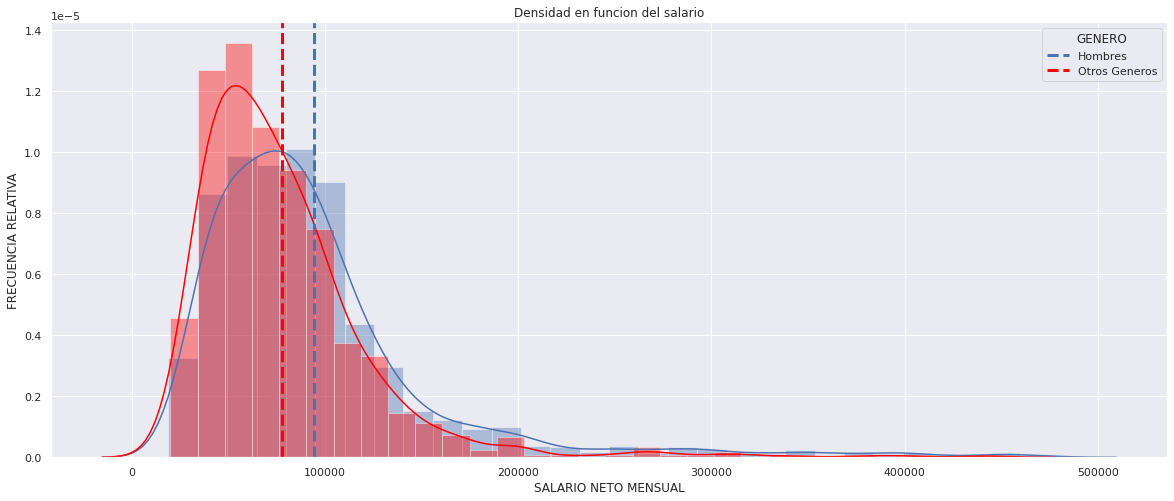

In [29]:
seaborn.set(rc={'figure.figsize':(20, 8)})
plt.figure(figsize=(20, 8))
ax1 = seaborn.distplot(groupA, bins=30, color='b')
ax2 = seaborn.distplot(groupB, bins=30, color='red')
plt.axvline(numpy.mean(groupA), color='b', linestyle='dashed', linewidth=3, label='Hombres')
plt.axvline(numpy.mean(groupB), color='red', linestyle='dashed', linewidth=3, label='Otros Generos')
plt.legend(title="GENERO")
plt.xlabel("SALARIO NETO MENSUAL")
plt.ylabel("FRECUENCIA RELATIVA")
plt.title('Densidad en funcion del salario')
plt.show()

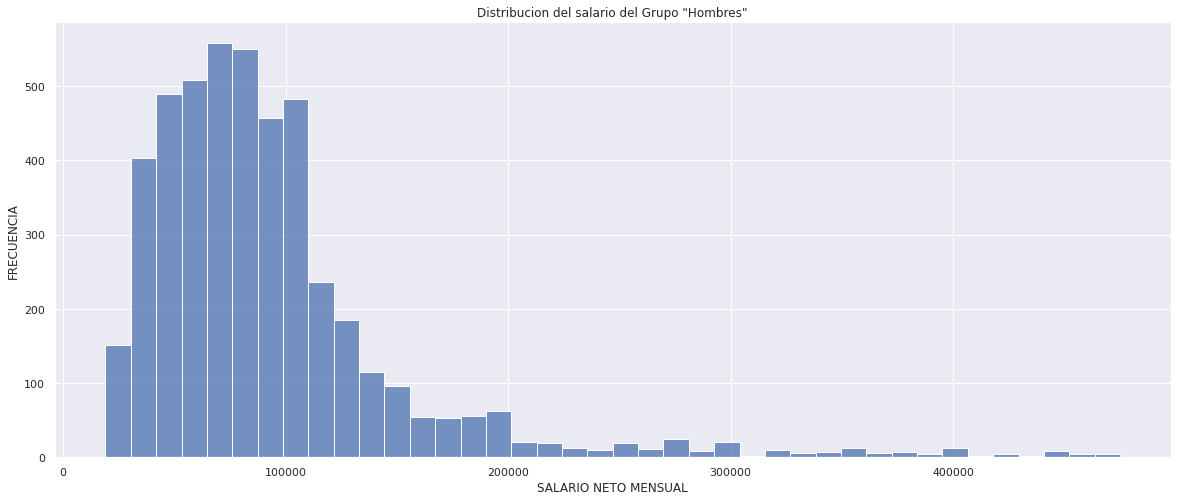

In [30]:
seaborn.histplot(groupA, bins=40)
scipy.stats.kurtosistest(groupA)
plt.title('Distribucion del salario del Grupo "Hombres"')
plt.xlabel("SALARIO NETO MENSUAL")
plt.ylabel("FRECUENCIA")
plt.show()

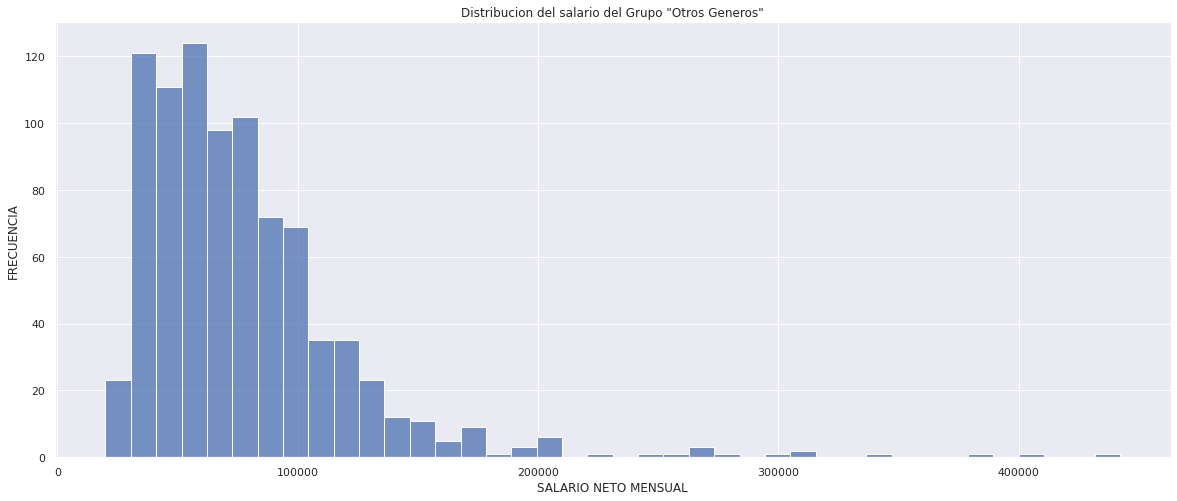

In [31]:
seaborn.histplot(groupB, bins=40)
scipy.stats.kurtosistest(groupB)
plt.title('Distribucion del salario del Grupo "Otros Generos"')
plt.xlabel("SALARIO NETO MENSUAL")
plt.ylabel("FRECUENCIA")
plt.show()

# Ejercicio 1: Estimación

**Consigna:**  Calcular una estimación puntual y un intervalo de confianza de nivel (1-alpha) para la resta entre la media del salario Neto para Hombres menos la media del salario Neto para otros géneros(diferencia de las medias entre el grupoA y grupoB). 
¿Cómo se relaciona este intervalo de confianza con el test de hipótesis?

Siendo $μ_1$ la el promedio poblacional para "salarios de programadores en Argentina de genero Hombre" y $\mu_2$ el "promedio pobalcional para salarios de programadores de los demas generos", el estimador puntual para la diferencia de medias poblacionales $μ_1 -μ_2$ esta dado por la diferencia de medias muestrales calculadas sobre estos mismos grupos sobre la muestra seleccionada por la encuesta Sysarmy:
$\bar x_2 -  \bar x_2$

El intervalo de confianza generado con los datos muestrales y un nivel de confianza determinado, genera una zona critica de rechazo en la distribución de probabilidad del estadistico utilizado. Si el calculo del estadistico pertenece a dicho intervalo, se aceptara la hipótesis, mientras que si el estadistico de prueba arroja un resultado en la zona critica se rechazará la hipotesis nula.

In [32]:
X_A=groupA.mean() #promedio grupoA
s_A=(groupA.std())*(groupA.std()) #varianza muestral gA
n_A=groupA.count() #n del grupoA (cantidad de hombres en la muestra)
X_B=groupB.mean() #promedio grupoB
s_B=(groupB.std())*(groupB.std()) #varianza muestral gB
n_B=groupB.count() #n del grupoB (cantidad de ~hombres en la muestra)
alpha1=0.05
E=X_A - X_B
nu=(((s_A/n_A)+(s_B/n_B))**2)/(((s_A/n_A)**2/(n_A-1))+((s_B/n_B)**2/(n_B-1))) #grados de libertad
t=scipy.stats.t.ppf(1-(alpha1/2), nu)    
Li=E - t*(((s_A/n_A)+(s_B/n_B))**(0.5))
Ls=E + t*(((s_A/n_A)+(s_B/n_B))**(0.5))
print('El promedio de salario en la subpoblacion de hombres es %.2f, mientras que el promedio de salario en la subpoblacion de otros generos es %.2f' % (X_A, X_B))
print('El valor esperado para la diferencia promedios de salarios entre las subpoblaciones es = $%.2f' % (E))
print('Con un nivel de significacion alpha = %.2f, el intervalo de confianza para ese valor es = ($%.2f,$%.2f)' % (alpha1, Li, Ls))


El promedio de salario en la subpoblacion de hombres es 94206.25, mientras que el promedio de salario en la subpoblacion de otros generos es 77764.02
El valor esperado para la diferencia promedios de salarios entre las subpoblaciones es = $16442.23
Con un nivel de significacion alpha = 0.05, el intervalo de confianza para ese valor es = ($12937.29,$19947.17)


## Ejercicio 2: Test de hipótesis


Describir formalmente los distintos componentes de un test de hipótesis para comprobar si la distribución de los salarios es distinta entre los grupos A y B.

**Hipotesis nula $H_0$:** Se plantea y presupone verdadera a priori, especifica los valores de un parámetro de la distribución de la variable aleatoria observada en el experimento.

**Hipotesis alternativa $H_1$:** Propone como posibles valores del parámetro analizado el conjunto de valores complementarios al postulado bajo $H_0$.

**Definicion nivel de significacion:** Es la probabilidad de rechazar $H_0$ cuando $H_0$, es verdadera. Es decir:
$ \alpha = P ( rechazar\: H_0 / H_0 \:es \:verdadera) $

**Estadistico de prueba**: El estadistico de prueba es una función de las mediciones muestrales, cuya distribución es conocida y queda completamente especificada bajo $H_0$. Es decir que es posible calcular sus probabilidades acumuladas en un intervalo dado, estas probabilidaes conducen a aceptar o rechazar $H_0$.




##Test dos colas

Si bien la estimación por intervalo de confianza no abarca al 0, como estimador puntual, inicialmente supondremos una hipotesis en que los promedios de salarios sn iguales, es decir:

**Hipótesis Nula**

$H_0\toμ_1 -μ_2=0$

**Hipótesis Alternativa**

$H_1\toμ_1 -μ_2\ne0$

**Estadístico (Pivote)**
  * El estadístico es
  $t=\frac{\left(x_1 - x_2  \right)-\left(\mu_1 - \mu_2  \right)}{\sqrt{\frac{s_{1}^{2}}{n_1}+\frac{s_{2}^{2}}{n_2}}}  $

  Con:

  $x_i= $ media muestral

  $s_i^{2}= $ varianza muestral

  $n_i=$ tamano de muestra

  * El estadistico de prueba $t$ bajo $H_0$ tiene distribución t-student con $\nu$ grados de libertad, donde 

  $\nu =\frac{ \left ( \frac{s_{1}^{2}}{n_1}+\frac{s_{2}^{2}}{n_2} \right )^{2}}{\frac{s_{1}^{4}}{n_1^{2}\nu_1}+\frac{s_{2}^{4}}{n_2^{2}\nu_2}}$

In [33]:
def dif_mean(arr_1, arr_2, alpha):

    nu=(((s_A/n_A)+(s_B/n_B))**2)/(((s_A/n_A)**2/(n_A-1))+((s_B/n_B)**2/(n_B-1))) #grados de libertad
    t=scipy.stats.t.ppf(1-(alpha/2), nu)    
    Li=E - t*(((s_A/n_A)+(s_B/n_B))**(0.5))
    Ls=E + t*(((s_A/n_A)+(s_B/n_B))**(0.5))
    print('El valor esperado para la diferencia de medias es = $%.2f' % (E))
    print('Con un nivel de significacion alpha = %.2f, el intervalo de confianza para ese valor es es = ($%.2f,$%.2f)' % (alpha, Li, Ls))
    
    #TH por p-valor
    statistic, pvalue=scipy.stats.ttest_ind(arr_1, arr_2,equal_var=False, nan_policy='omit')
    #print('p-valor=%.25f' % (pvalue))
    #print('t rechazo=%.5f, grados de libertad=%.5f, t critico=%.5f' % (t,nu,statistic))
    print('Con un nivel de significacion %.2f' % (alpha))
    if pvalue > alpha/2:
        print('No existe evidencia para suponer que las distribuciones sean distintas (no puedo rechazar H0)')
    else:
        print('Y a traves de los datos muestrales obtenidos, hay evidencia suficiente para suponer que los promedios de las distribuciones son significativamente diferentes (rechazo H0)')
    

In [34]:
alpha=0.01
dif_mean(groupA, groupB, alpha)

El valor esperado para la diferencia de medias es = $16442.23
Con un nivel de significacion alpha = 0.01, el intervalo de confianza para ese valor es es = ($11833.88,$21050.58)
Con un nivel de significacion 0.01
Y a traves de los datos muestrales obtenidos, hay evidencia suficiente para suponer que los promedios de las distribuciones son significativamente diferentes (rechazo H0)


In [35]:
alpha=0.05
dif_mean(groupA, groupB, alpha)

El valor esperado para la diferencia de medias es = $16442.23
Con un nivel de significacion alpha = 0.05, el intervalo de confianza para ese valor es es = ($12937.29,$19947.17)
Con un nivel de significacion 0.05
Y a traves de los datos muestrales obtenidos, hay evidencia suficiente para suponer que los promedios de las distribuciones son significativamente diferentes (rechazo H0)


##Test una cola

**Hipótesis Nula**

$H_0\toμ_1 -μ_2\leq K$

**Hipótesis Alternativa**

$H_1\toμ_1 -μ_2>K$

**Estadístico (Pivote)**
  * El estadístico es
  $t=\frac{\left(x_1 - x_2  \right)-\left(\mu_1 - \mu_2  \right)}{\sqrt{\frac{s_{1}^{2}}{n_1}+\frac{s_{2}^{2}}{n_2}}} =\frac{\left(x_1 - x_2  \right)-K}{\sqrt{\frac{s_{1}^{2}}{n_1}+\frac{s_{2}^{2}}{n_2}}}  $
 $t$ bajo $H_0$ tiene distribución t-student con media 0 y varianza $\frac{\nu}{\nu-2}$ donde $\nu$ son los grados de libertad y 

  $\nu =\frac{ \left ( \frac{s_{1}^{2}}{n_1}+\frac{s_{2}^{2}}{n_2} \right )^{2}}{\frac{s_{1}^{4}}{n_1^{2}\nu_1}+\frac{s_{2}^{4}}{n_2^{2}\nu_2}}$
  
  
  Con:

  $x_i= $ media muestral

  $s_i^{2}= $ varianza muestral

  $n_i=$ tamano de muestra

 
  

In [36]:
def dif_mean_CD(arr_1, arr_2, alpha):

    #nu=(((s_A/n_A)+(s_B/n_B))**2)/((s_A**2/((n_A-1)*(n_A**2)))+(s_B**2/(n_B-1)*(n_B**2)))
    nu=(((s_A/n_A)+(s_B/n_B))**2)/(((s_A/n_A)**2/(n_A-1))+((s_B/n_B)**2/(n_B-1)))
    t=scipy.stats.t.ppf(1-(alpha), nu)
    
    statistic= (E-K)/(((s_A/n_A)+(s_B/n_B))**(0.5))    
    Li=E-K - t*(((s_A/n_A)+(s_B/n_B))**(0.5))
    Ls=E-K + t*(((s_A/n_A)+(s_B/n_B))**(0.5))
    print('El valor esperado para la diferencia de medias es = $%.2f' % (E))
    print('Con un nivel de significacion alpha = %.2f, el intervalo de confianza para ese valor es es = ($%.2f,$%.2f)' % (alpha, Li, Ls))
    print('t rechazo=%.5f, nu=%.0f, t critico=%.5f' % (t,nu,statistic))

    #TH por p-valor
    pvalue= 1 - scipy.stats.t.cdf(statistic, nu)
    print('p-valor=%.25f' % (pvalue))
    if pvalue > alpha:
        print('La brecha de salario en favor de hombres es de hasta  $%.2f  (no existe evidencia para rechazar H0)' % (K))
    else:
        print('Rechazo H0')

In [37]:
alpha=0.05
K=13000
dif_mean_CD(groupA, groupB, alpha)

El valor esperado para la diferencia de medias es = $16442.23
Con un nivel de significacion alpha = 0.05, el intervalo de confianza para ese valor es es = ($501.33,$6383.13)
t rechazo=1.64583, nu=1557, t critico=1.92639
p-valor=0.0271186584281787324002266
Rechazo H0


##La distribución podria considerarse normal a pesar de tener varianzas desconocidas???

Y si dado que la muestra es considerablemente grande supongo una distribucion normal, con $s_A≈\sigma_A$ y $s_B≈\sigma_B$?

En este caso el intervalo de confianza para la diferencia de medias de dos poblaciones  $μ_1 -μ_2$ con un tamaño de muestra grande se puede calcular como
$\left(x_1 - x_2  \right) \mp Z_{\alpha/2}\sqrt{\frac{\sigma_{1}^{2}}{n_1}+\frac{\sigma_{2}^{2}}{n_2}}$


**Hipótesis Nula**

$H_0\toμ_1 -μ_2=0$

**Hipótesis Alternativa**

$H_1\toμ_1 -μ_2\ne0$

**Estadístico (Pivote)**

  $Z=\frac{\left(x_1 - x_2  \right)-\left(\mu_1 - \mu_2  \right)}{\sqrt{\frac{\sigma_{1}^{2}}{n_1}+\frac{\sigma_{2}^{2}}{n_2}}}  $
   bajo $H_0$ tiene distribución normal con media $\mu=0$ y desvio $\sigma=1$


Calculo del intervalo de confianza

In [38]:
Liz=X_A-X_B - 1.96*(((s_A/n_A)+(s_B/n_B))**0.5)
Lsz=X_A-X_B + 1.96*(((s_A/n_A)+(s_B/n_B))**0.5)
print('E=$%.2f,IC=($%.2f, $%.2f)' % (E,Liz, Lsz))


E=$16442.23,IC=($12939.95, $19944.51)


In [39]:
Zc=(X_A-X_B)/(((s_A/n_A)+(s_B/n_B))**0.5)
pzvalue=scipy.stats.norm.sf (abs (Zc))
print('Estadistico=%.2f, p-valor=%.30f' % (Zc, pzvalue))


Estadistico=9.20, p-valor=0.000000000000000000017625491677


Nivel de significación $\alpha=0,05$ entonces $Z_{\alpha/2}=1,96$

Region de recahzo: $RR={z>1,96}$

$Z_c >>> RR$ rechazo $H_0$

### [Opcional] 2.3 Potencia del test

Nuestra muestra, ¿era lo suficientemente grande para detectar si existe o no una diferencia entre los grupos?

1. Utilice la función `tt_ind_solve_power` para calcular el tamaño necesario de la muestra para un poder estadístico de 0.8, 0.9 y 0.95, asumiendo una significancia estadística de 0.05.
2. ¿Cómo intepretan el poder estadístico de un test? Dado su conocimiento de dominio sobre los datos, ¿les parece que esta muestra es lo suficientemente grande para ser representativo de la tendencia general? ¿y para utilizarlo en un juicio penal contra una empresa XX por una causa de discriminación?

[Documentación](https://www.statsmodels.org/stable/generated/statsmodels.stats.power.tt_ind_solve_power.html)

NOTA: este análisis debería hacerse ANTES de recolectar los datos.

In [40]:
from statsmodels.stats.power import tt_ind_solve_power

In [41]:
effect_size = (groupA.mean() - groupB.mean()) / groupB.std()
# nobs1=None  - What we want to know
alpha = 0.05
ratio = n_B / n_A
power = 0.8 #cambiar a 0.8, 0.9 y 0.95

nobsGroup_A=tt_ind_solve_power(effect_size=effect_size, alpha=alpha, nobs1=None, power=power, ratio=ratio)
print('Numero de observaciones necesarias en la muestra aleatoria de Hombres=%.0f para obtener una potencia de test de %.2f' % (nobsGroup_A, power))
print('Numero de observaciones necesarias en la muestra aleatoria de ~Hombres=%.0f para obtener una potencia de test de %.2f' % (nobsGroup_A*ratio, power))
if n_A > nobsGroup_A and n_B > nobsGroup_A*ratio:
        print('Los muestra tomada (%.0f hombres y %.0f otros generos) tiene un tamano suficiente para realizar un test de potencia %.2f' % (n_A, n_B, power))
else:
        print('El tamano de una de las muestras es insuficiente para un test de potencia %.2f' % (power))

Numero de observaciones necesarias en la muestra aleatoria de Hombres=384 para obtener una potencia de test de 0.80
Numero de observaciones necesarias en la muestra aleatoria de ~Hombres=71 para obtener una potencia de test de 0.80
Los muestra tomada (4693 hombres y 874 otros generos) tiene un tamano suficiente para realizar un test de potencia 0.80


In [42]:
Effect_size = (groupA.mean() - groupB.mean()) / (((groupB.std()**2 + groupB.std()**2)/2)**0.5)
alpha = 0.05
ratio = n_B/n_A

Power=tt_ind_solve_power(effect_size=effect_size, alpha=alpha, nobs1=n_A,power=None, ratio=ratio)
print(Power)
print(Effect_size)

tt_ind_solve_power(effect_size=None, alpha=0.05, nobs1=4459,power=0.8, ratio=n_B/n_A)

1.0
0.3617208287939657


0.10590522327220327



---
A pesar de que el tamaño de la muestra es lo suficientemente grande en terminos técnicos, necesitariamos más información sobre la metodología de la encuesta y la seleccion de los casos, para poder afirmar que la muestra es representativa de la realidad de la población. 
---



## Ejercicio 3: Comunicación y visualización

**Consigna:** Seleccionen un resultado que les parezca relevante a partir de alguno de los ejercicios del entregable. Diseñe e implemente una comunicación en base a este mensaje, en un archivo PDF.

Elija las palabras y visualización más adecuada para que la comunicación sea entendible, efectiva y se dapte a UNA de las siguientes situaciones:

1. Una sección en un artículo de difusión a presentar como parte de una organización sin fines de lucro.
No más de 1 página A4 (o dos si los gráficos son muy grandes).
  1. Ejemplo: Alguna de las secciones [Los ecosistemas de emprendimiento de América Latina y el Caribe frente al COVID-19: Impactos, necesidades y recomendaciones](https://publications.iadb.org/es/los-ecosistemas-de-emprendimiento-de-america-latina-y-el-caribe-frente-al-covid-19-impactos-necesidades-y-recomendaciones), por ejemplo la sección *2.2. Reacciones de los emprendedores*.
  2. Ejemplo: Alguna de las secciones de [The state of gender pay gap in 2021](https://www.payscale.com/data/gender-pay-gap?tk=carousel-ps-rc-job)
  3. Puntos clave: 
    1. Simpleza de los gráficos.
    2. Comunicación en lenguaje simple a personas que no son necesariamente expertos de dominio.
    2. Selección de UNA oración sobre la que se hace énfasis.
    3. No es necesario que mencionen objetivos ni descripciones del conjunto de datos, se supone que eso ya estaría explicado en otras secciones del informe.

2. Una publicación científica o reporte técnico interno. No más de una página A4:
  2. Ejemplo: La sección de resultados de [IZA DP No. 12914: The Impact of a Minimum Wage Change on the Distribution of Wages and Household Income](https://www.iza.org/publications/dp/12914/the-impact-of-a-minimum-wage-change-on-the-distribution-of-wages-and-household-income).
  2. Ejemplo: Alguna de las secciones de [Temporary reduction in daily global CO2 emissions during the COVID-19 forced confinement](https://www.nature.com/articles/s41558-020-0797-x)
  3. Puntos clave:
    3. Nivel de detalle técnico requerido. Es necesario justificar la validez del análisis.
    4. La idea presentada puede ser más compleja. Pueden asumir que la audiencia tiene conocimiento técnico y va a analizar las visualizaciones en detalle. 
    5. Pueden presentar más en detalle las limitaciones del análisis (significancia estadística, etc.)
    2. No es necesario que mencionen objetivos ni descripciones del conjunto de datos, se supone que eso ya estaría explicado en otras secciones del informe.

3. Un tweet (o post de LinkedIn) para la cuenta de su empresa consultora que hace análisis de datos. El objetivo es promocionar un análisis de datos abiertos que van a incluir en su portfolio:
  1. Ejemplo: [Comparación vacunas covid](https://twitter.com/infobeautiful/status/1381577746527236098?s=20)
  2. Ejemplo: [Tweet del BID](https://twitter.com/el_BID/status/1388508583944507396?s=20). Lo valioso de este tweet es que usaron un único número para transmitir un mensaje. Puede ser algo así, o con un gráfico muy simple.
  3. Ejemplo: [Cambio climático](https://twitter.com/UNFCCC/status/1387732156190011394?s=20) Es un muy buen ejemplo, excepto que el gráfico no se lee nada y hay que entrar a la publicación original.
  3. Ejemplo: [¿Cuánto están los programadores en las empresas?](https://www.linkedin.com/posts/denis-rothman-0b034043_tech-career-work-activity-6793861923269054464-gS6y) (No verificamos la veracidad o seriedad de la fuente).
  4. Puntos clave:
    1. Su audiencia no va a mirar la visualización por más de unos segundos, y no tiene conocimiento técnico.
  3. Tienen que incluir además una *breve* descripción de cómo obtuvieron los datos que están presentando, que no entraría en el tweet.


In [43]:
min=18900
max=500000
df_nuevo= df[(df.salary_monthly_NETO > min) & (df.salary_monthly_NETO < max)]

df_nuevo= df_nuevo[['profile_gender', 'profile_studies_level','work_years_in_company', 'work_contract_type', 'salary_monthly_NETO']]

is_man = df_nuevo.profile_gender == 'Hombre'
#Niveles de estudio
is_T = df_nuevo.profile_studies_level == 'Terciario'
is_U = df_nuevo.profile_studies_level == 'Universitario'
is_P = df_nuevo.profile_studies_level == 'Posgrado'

is_wct=df_nuevo.work_contract_type == 'Full-Time'
is_wy = df_nuevo.work_years_in_company < 30

groupAT = df_nuevo[(is_man) & is_T & is_wy & is_wct].salary_monthly_NETO
groupBT = df_nuevo[(~is_man) & is_T & is_wy & is_wct].salary_monthly_NETO

groupAU = df_nuevo[(is_man) & is_U & is_wy & is_wct].salary_monthly_NETO
groupBU = df_nuevo[(~is_man) & is_U & is_wy & is_wct].salary_monthly_NETO

groupAP = df_nuevo[(is_man) & is_P & is_wy & is_wct].salary_monthly_NETO
groupBP = df_nuevo[(~is_man) & is_P & is_wy & is_wct].salary_monthly_NETO

X_AT=groupAT.mean() #promedio grupoA
X_AU=groupAU.mean()
X_AP=groupAP.mean()

X_BT=groupBT.mean() #promedio grupoB
X_BU=groupBU.mean()
X_BP=groupBP.mean()

E = pd.DataFrame()
N_est=['Nivel Terciario','Nivel Universitario','Nivel Posgrado']

Dif_medias=[(X_AT - X_BT)*100/X_AT, (X_AU - X_BU)*100/X_AU, (X_AP - X_BP)*100/X_AP]
m_hom=[X_AT, X_AU, X_AP]
m_otr=[X_BT, X_BU, X_BP]

E['Nivel de Estudio']=N_est
E['Diferencia Medias']=Dif_medias
E['Media Hombres']=m_hom
E['Media Otros Generos']=m_otr

E['Diferencia Medias']=E['Diferencia Medias'].astype(int)


In [44]:
E

,Nivel de Estudio,Diferencia Medias,Media Hombres,Media Otros Generos
0,Nivel Terciario,11,79084.015987,69780.307519
1,Nivel Universitario,17,93053.392766,76411.301927
2,Nivel Posgrado,24,124281.805825,93672.820323


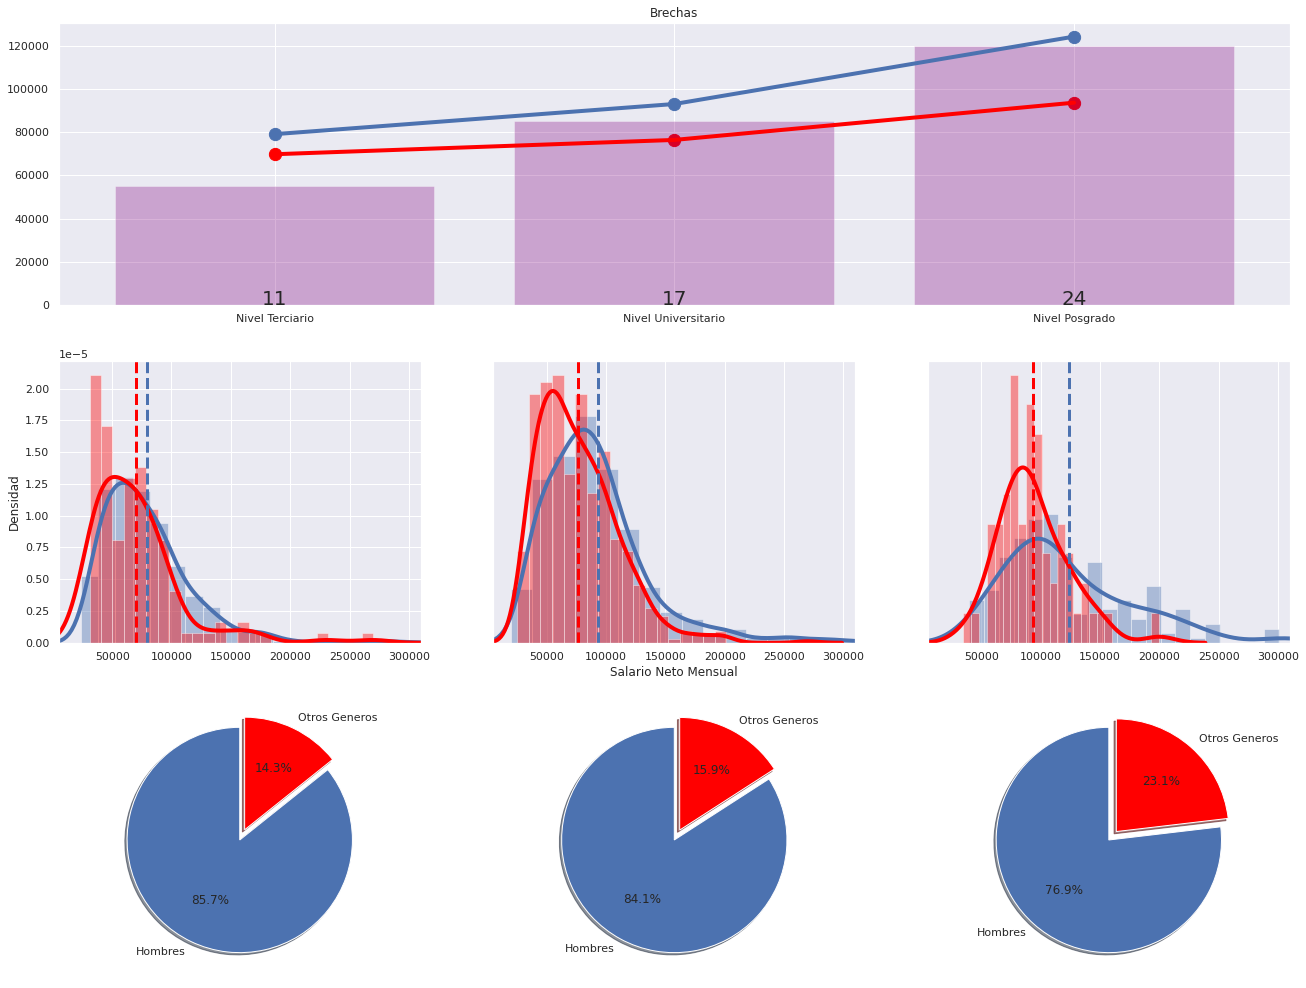

In [47]:
fig = plt.figure()
fig.subplots_adjust(bottom=0.025, left=0.025, top = 0.975, right=0.975)
seaborn.set(rc={"figure.figsize": (18, 14)})

plt.subplot(3, 1, 1)
plt.scatter(E['Nivel de Estudio'],E['Media Hombres'], color='b', s=150)
plt.scatter(E['Nivel de Estudio'],E['Media Otros Generos'], color='red', s=150)
plt.plot(E['Nivel de Estudio'],E['Media Hombres'], color='b', linewidth=4)
plt.plot(E['Nivel de Estudio'],E['Media Otros Generos'], color='red', linewidth=4)
ax1 = plt.bar(E['Nivel de Estudio'],E['Diferencia Medias']*5000, alpha=0.3, color='purple')
def add_value_label(x_list,y_list):
    for i in range(0, len(x_list)):
        plt.text(i,y_list[i],y_list[i], ha="center", size=20)
add_value_label(E['Nivel de Estudio'],E['Diferencia Medias'])
plt.subplot(3, 1, 1).set_title('Brechas')

plt.subplot(3, 3, 4)
plt.subplot(3, 3, 4).set_ylabel("Densidad")
ax1 = seaborn.distplot(groupAT, bins=25, color='b',kde_kws={"lw": 4})
ax2 = seaborn.distplot(groupBT, bins=25, color='red',kde_kws={"lw": 4})
plt.axvline(numpy.mean(groupAT), color='b', linestyle='dashed', linewidth=3, label='Hombres')
plt.axvline(numpy.mean(groupBT), color='red', linestyle='dashed', linewidth=3, label='Otros Generos')
plt.subplot(3, 3, 4).set_xlabel(" ")
plt.xlim(5000,310000)

plt.subplot(3, 3, 5)
plt.yticks(())
ax1 = seaborn.distplot(groupAU, bins=25, color='b',kde_kws={"lw": 4})
ax2 = seaborn.distplot(groupBU, bins=25, color='red',kde_kws={"lw": 4})
plt.axvline(numpy.mean(groupAU), color='b', linestyle='dashed', linewidth=3, label='Hombres')
plt.axvline(numpy.mean(groupBU), color='red', linestyle='dashed', linewidth=3, label='Otros Generos')
plt.subplot(3, 3, 5).set_xlabel("Salario Neto Mensual")
plt.xlim(5000,310000)

plt.subplot(3, 3, 6)
plt.yticks(())
plt.subplot(3, 3, 6).set_xlabel(" ")
ax1 = seaborn.distplot(groupAP, bins=25, color='b',kde_kws={"lw": 4})
ax2 = seaborn.distplot(groupBP, bins=25, color='red',kde_kws={"lw": 4})
plt.axvline(numpy.mean(groupAP), color='b', linestyle='dashed', linewidth=3, label='Hombres')
plt.axvline(numpy.mean(groupBP), color='red', linestyle='dashed', linewidth=3, label='Otros Generos')
plt.subplot(3, 3, 6).set_xlabel(" ")
plt.xlim(5000,310000)

plt.subplot(3, 3, 7)
plt.xticks(()), plt.yticks(())
plt.subplot(3, 3, 7).set_title(' ')
labels = "Hombres","Otros Generos"
sizes = [len(groupAT), len(groupBT)]
colores = ["b","red"]
desfase = (0,  0.1)
ax1=plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90, colors=colores, explode=desfase)

plt.subplot(3, 3, 8)
plt.xticks(()), plt.yticks(())
plt.subplot(3, 3, 8).set_title(' ')
labels = "Hombres","Otros Generos"
sizes = [len(groupAU), len(groupBU)]
colores = ["b","red"]
desfase = (0,  0.1)
ax1=plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90, colors=colores, explode=desfase)

plt.subplot(3, 3, 9)
plt.xticks(()), plt.yticks(())
plt.subplot(3, 3, 9).set_title(' ')
labels = "Hombres","Otros Generos"
sizes = [len(groupAP), len(groupBP)]
colores = ["b","red"]
desfase = (0,  0.1)
ax1=plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90, colors=colores, explode=desfase)

plt.show()

El analisis de los datos recolectados por sysarmy en su encuesta a programadores, hace visibles dos brechas significativas dentro de este mercado laboral. 

En primer lugar se observa una brecha muy importante en la participacion, la proporcion de otros generos es inferior al 25% del total de trabajadores. Esta diferencia es máxima en el grupo de trabajadores menos calificados y disminuye conforme aumenta el nivel educativo.

En segundo lugar la brecha en los salarios, entendida como la diferencia entre los promedios de las subpoblaciones de hombres por un lado y demas generos por otro, sobre el promedio de salario para hombres. Cuando analizamos la totalidad de los trabajadores la diferencia en las remuneraciones promedio, es alrrededor del 15%, pero cuando filtramos por otra variable (que ya comprobamos en la notebook anterior relacionada a la remuneracion neta), encontramos que la brecha de salarios entre generos es menor para los empleados menos calificados y a diferencia de la participación, la brecha salarial crece fuertemente conforme aumenta el nivel educativo, a tal punto que para los trabajadores con posgrado, la brecha duplica a la percibida por los trabajadores que solo cuentan con nivel terciario. 

